# Numerical Integrators

In this notebook, we provide a resource -- various methods of integrating ordinary differential equations (ODEs) numerically. We will cover the following methods:
* Euler
* Euler-Cromer
* Velocity Verlet
* Runge-Kutta 2nd order
* Built-in Python integrators

We have written these codes as simply as possible to make them easy to read and to see where the algorithms differ. We have also included an example of a simple harmonic oscillator to demonstrate the methods (recurrent oscillatory behavior is a good test of methods). 

The simple harmonic oscillator is described by the following second order ODE:

$$\frac{d^2x}{dt^2} = -\omega^2 x$$

where $\omega$ is the angular frequency of the oscillator. We can rewrite this as two first order ODEs:

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\omega^2 x$$

## Euler's Method

Euler's method is the simplest numerical integrator. For the SHO, we can write the update equations as:

$$x_{n+1} = x_n + v_n \Delta t$$
$$v_{n+1} = v_n - \omega^2 x_n \Delta t$$

where $x_n$ and $v_n$ are the position and velocity at time $t_n$, and $\Delta t$ is the time step.

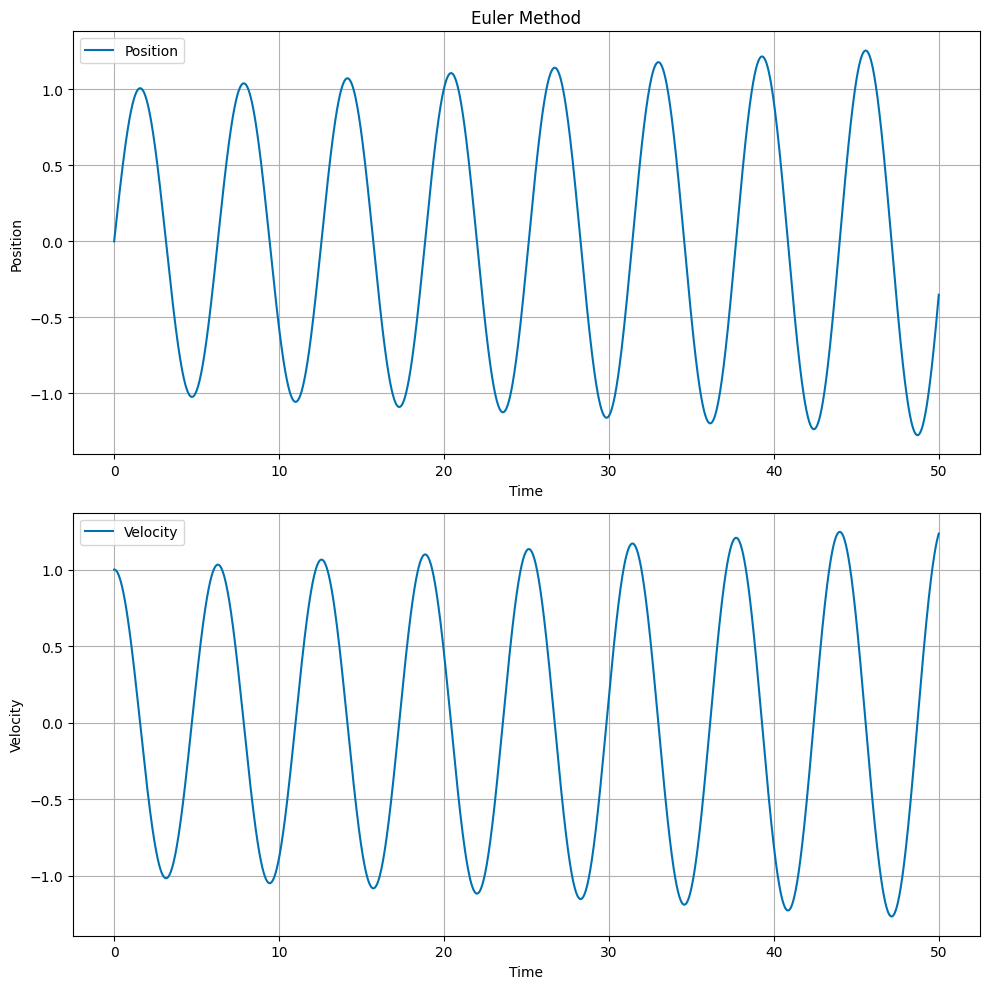

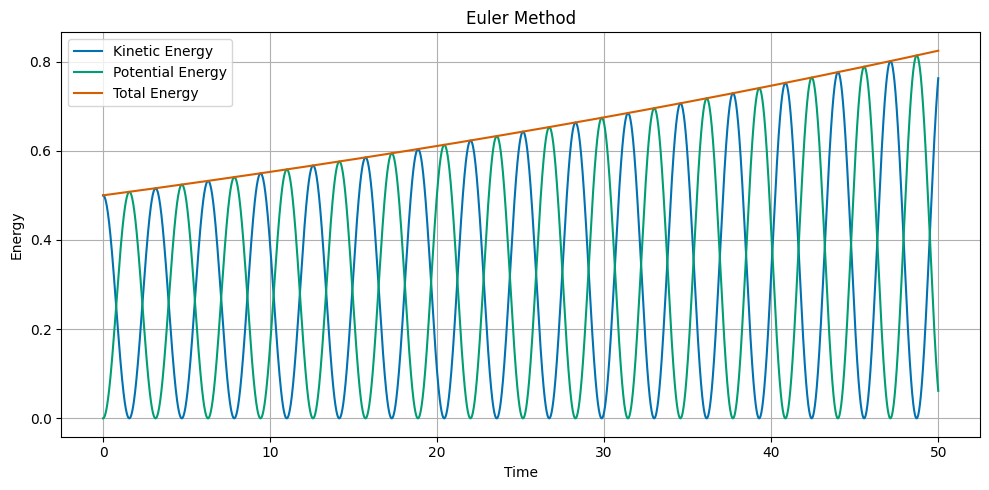

In [ ]:
# Euler's method

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')

x0 = 0
v0 = 1
omega = 1

t0 = 0
tf = 50
dt = 0.01

N = int((tf - t0) / dt)

t = np.linspace(t0, tf, N)
x = np.zeros(N)
v = np.zeros(N)

x[0] = x0
v[0] = v0

for i in range(1, N):
    
    x[i] = x[i-1] + v[i-1] * dt
    v[i] = v[i-1] - omega**2 * x[i-1] * dt
    
# Plot the position and velocity as a function of time

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Euler Method')

ax[0].plot(t, x, label='Position')
ax[0].set_ylabel('Position')
ax[0].set_xlabel('Time')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, v, label='Velocity')
ax[1].set_ylabel('Velocity')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Plot the kinetic, potential, and total energy as a function of time

KE = 0.5 * v**2
PE = 0.5 * omega**2 * x**2
ETOT = 0.5 * v**2 + 0.5 * omega**2 * x**2

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Euler Method')
ax.plot(t, KE, label='Kinetic Energy')
ax.plot(t, PE, label='Potential Energy')
ax.plot(t, ETOT, label='Total Energy')
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## Euler-Cromer Method

The Euler-Cromer method is a slight modification of Euler's method. The update equations are:

$$v_{n+1} = v_n - \omega^2 x_n \Delta t$$
$$x_{n+1} = x_n + v_{n+1} \Delta t$$

Note that the position is updated using the new velocity. The Cromer correction is a small improvement over Euler's method, and helps with energy conservation.

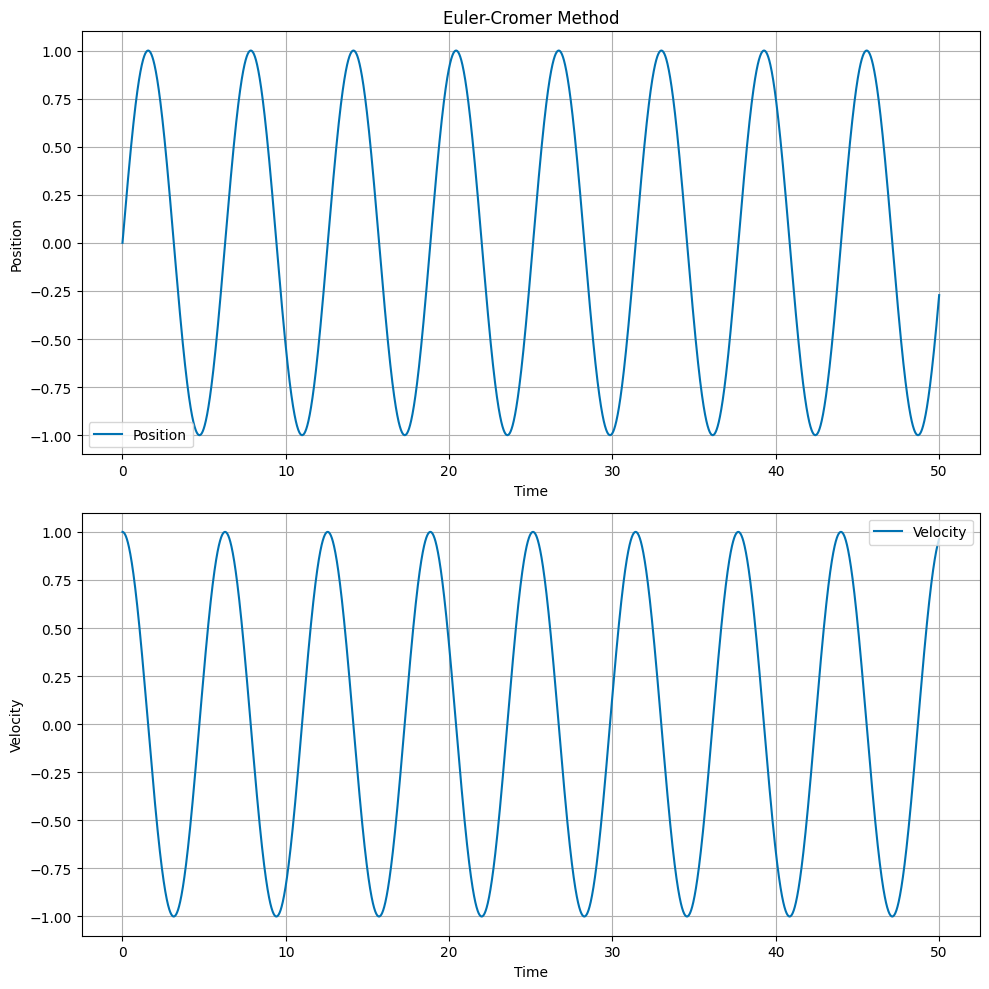

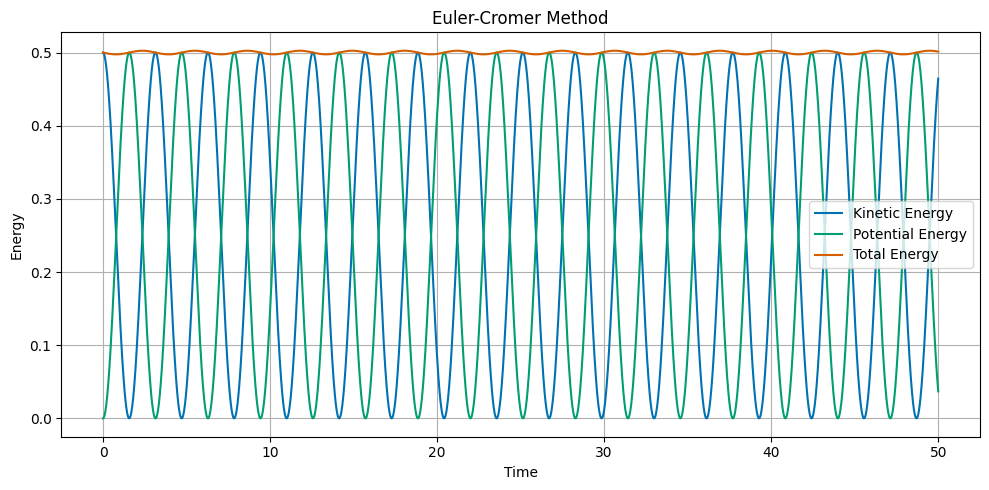

In [17]:
# Euler-Cromer Method

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')

x0 = 0
v0 = 1
omega = 1

t0 = 0
tf = 50
dt = 0.01

N = int((tf - t0) / dt)

t = np.linspace(t0, tf, N)
x = np.zeros(N)
v = np.zeros(N)

x[0] = x0
v[0] = v0

for i in range(1, N):
    
    x[i] = x[i-1] + v[i-1] * dt
    v[i] = v[i-1] - omega**2 * x[i] * dt
    
# Plot the position and velocity as a function of time

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Euler-Cromer Method')

ax[0].plot(t, x, label='Position')
ax[0].set_ylabel('Position')
ax[0].set_xlabel('Time')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, v, label='Velocity')
ax[1].set_ylabel('Velocity')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Plot the kinetic, potential, and total energy as a function of time

KE = 0.5 * v**2
PE = 0.5 * omega**2 * x**2
ETOT = 0.5 * v**2 + 0.5 * omega**2 * x**2

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Euler-Cromer Method')
ax.plot(t, KE, label='Kinetic Energy')
ax.plot(t, PE, label='Potential Energy')
ax.plot(t, ETOT, label='Total Energy')
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()



## Velocity Verlet Method

The Velocity Verlet method is a symplectic integrator. The update equations are:

$$x_{n+1} = x_n + v_n \Delta t + \frac{1}{2} a_n \Delta t^2$$
$$v_{n+1} = v_n + \frac{1}{2} (a_n + a_{n+1}) \Delta t$$

where $a_n$ is the acceleration at time $t_n$. The acceleration is calculated from the position at time $t_n$. The principal difference between the Velocity Verlet method and the Euler and Euler-Cromer methods is that the position is updated using the average acceleration over the time step. The main advantage of the Velocity Verlet method is that it conserves energy.

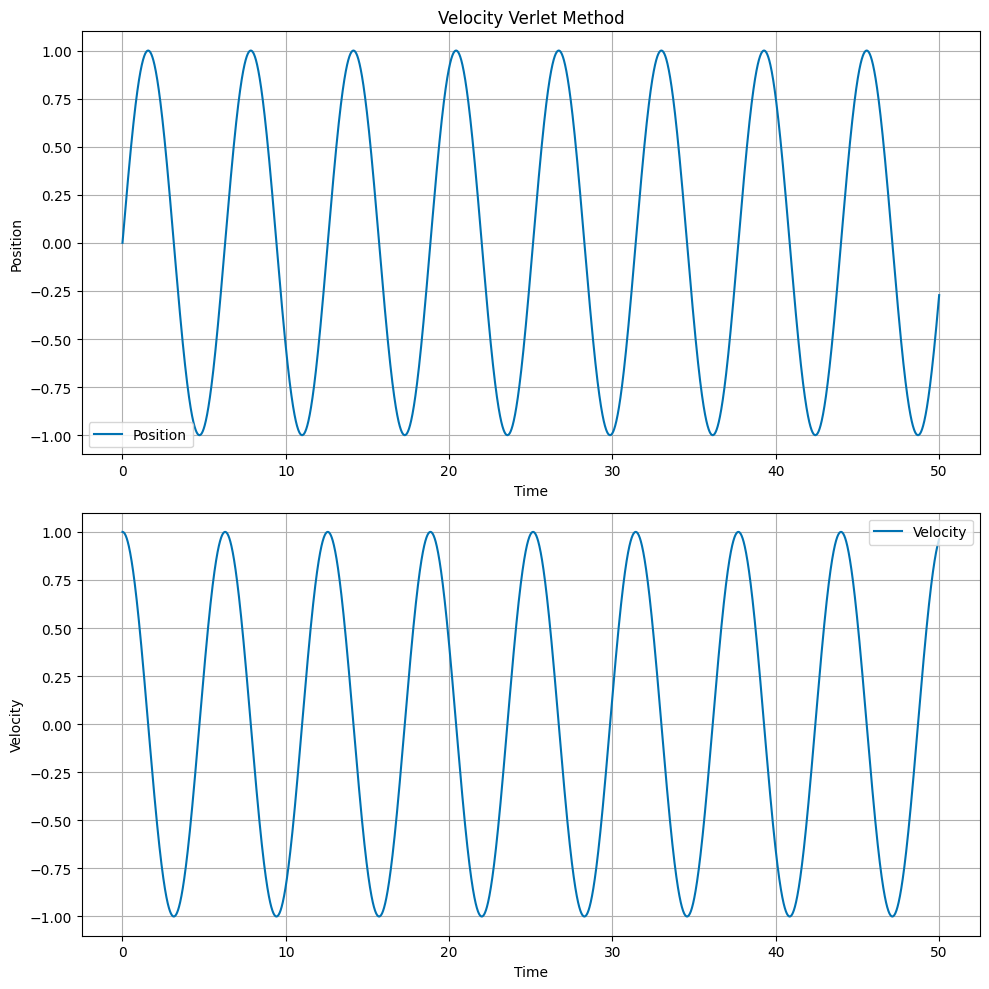

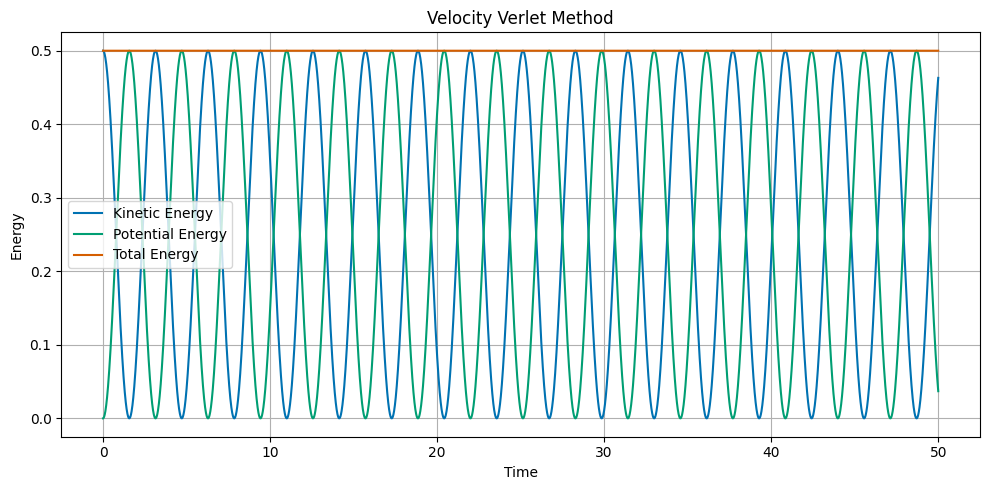

In [18]:
# Velocity Verlet Method

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')

x0 = 0
v0 = 1
omega = 1

t0 = 0
tf = 50
dt = 0.01

N = int((tf - t0) / dt)

t = np.linspace(t0, tf, N)
x = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)

x[0] = x0
v[0] = v0
a[0] = -omega**2 * x0

for i in range(1, N):
    
    x[i] = x[i-1] + v[i-1] * dt + 0.5 * a[i-1] * dt**2
    a[i] = -omega**2 * x[i]
    v[i] = v[i-1] + 0.5 * (a[i] + a[i-1]) * dt
    
# Plot the position and velocity as a function of time

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Velocity Verlet Method')

ax[0].plot(t, x, label='Position')
ax[0].set_ylabel('Position')
ax[0].set_xlabel('Time')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, v, label='Velocity')
ax[1].set_ylabel('Velocity')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Plot the kinetic, potential, and total energy as a function of time

KE = 0.5 * v**2
PE = 0.5 * omega**2 * x**2
ETOT = 0.5 * v**2 + 0.5 * omega**2 * x**2

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Velocity Verlet Method')
ax.plot(t, KE, label='Kinetic Energy')
ax.plot(t, PE, label='Potential Energy')
ax.plot(t, ETOT, label='Total Energy')
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## Runge Kutta 2nd Order Method

The Runge Kutta 2nd Order method is a more accurate numerical integrator. The update equations are:

$$k_{1x} = v_n \Delta t$$
$$k_{1v} = -\omega^2 x_n \Delta t$$
$$k_{2x} = (v_n + k_{1v}/2) \Delta t$$
$$k_{2v} = -\omega^2 (x_n + k_{1x}/2) \Delta t$$

$$x_{n+1} = x_n + k_{2x}$$
$$v_{n+1} = v_n + k_{2v}$$

The main idea of the Runge Kutta method is to calculate the average of the slopes at the beginning and the end of the time step. This takes additional computational effort, but results in a more accurate solution. It also conserves energy.

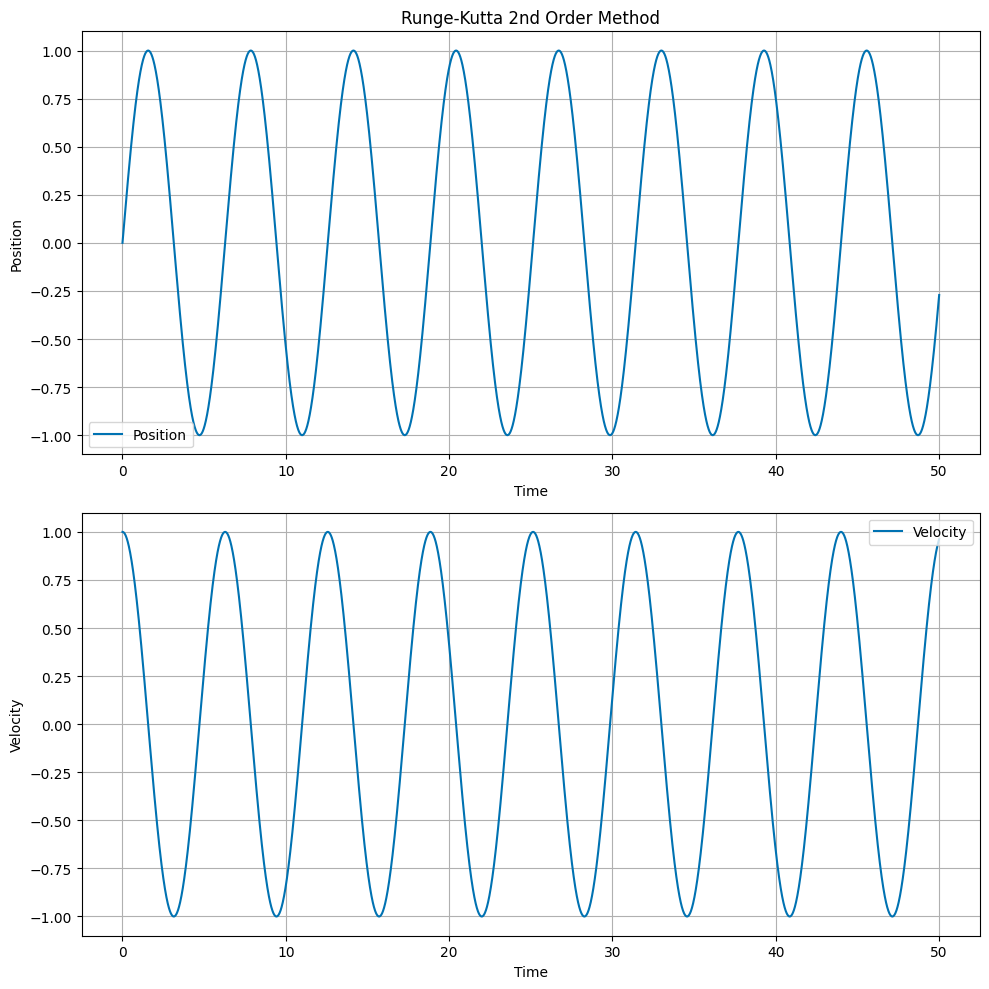

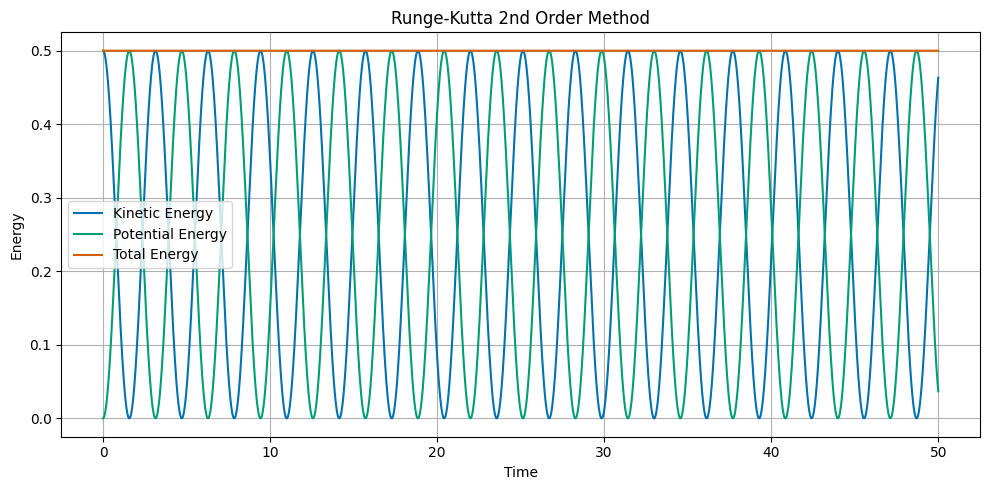

In [19]:
# Runge-Kutta Method 2nd Order

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')

x0 = 0
v0 = 1
omega = 1

t0 = 0
tf = 50
dt = 0.01

N = int((tf - t0) / dt)

t = np.linspace(t0, tf, N)
x = np.zeros(N)
v = np.zeros(N)

x[0] = x0
v[0] = v0

for i in range(1, N):
    
    k1x = v[i-1] * dt
    k1v = -omega**2 * x[i-1] * dt
    
    k2x = (v[i-1] + k1v) * dt
    k2v = -omega**2 * (x[i-1] + k1x) * dt
    
    x[i] = x[i-1] + 0.5 * (k1x + k2x)
    v[i] = v[i-1] + 0.5 * (k1v + k2v)
    
# Plot the position and velocity as a function of time

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Runge-Kutta 2nd Order Method')

ax[0].plot(t, x, label='Position')
ax[0].set_ylabel('Position')
ax[0].set_xlabel('Time')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, v, label='Velocity')
ax[1].set_ylabel('Velocity')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Plot the kinetic, potential, and total energy as a function of time

KE = 0.5 * v**2
PE = 0.5 * omega**2 * x**2
ETOT = 0.5 * v**2 + 0.5 * omega**2 * x**2

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Runge-Kutta 2nd Order Method')
ax.plot(t, KE, label='Kinetic Energy')
ax.plot(t, PE, label='Potential Energy')
ax.plot(t, ETOT, label='Total Energy')
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## Built-in Python Integrators

All of the approaches above use a fixed time step. Python has built-in integrators that can adapt the time step to the problem. We will use the `odeint` function from the `scipy.integrate` module. This function uses the LSODA (Livermore Solver for Ordinary Differential Equations) algorithm, which is a variable time step integrator. The `odeint` function requires the user to define a function that returns the derivatives of the dependent variables. 

The process for this method is different than the above approaches because the `odeint` function requires the user to define a function that returns the derivatives of the dependent variables. The function we use:

```python
def derivs(y, t, omega):
    x, v = y
    return [v, -omega**2 * x]
```

where `y` is a list of the dependent variables, `t` is the independent variable, and `omega` is a parameter. The function returns a list of the derivatives of the dependent variables.

We then setup our arrays to store the time and initial conditions, and call the `odeint` function:

```python

y0 = [x0, v0]
t = np.linspace(t0, tf, N)
sol = odeint(derivs, y0, t, args=(omega,))
```

where `y0` is a list of the initial conditions, `t` is an array of the time steps, and `sol` is an array of the solution at each time step.

The solution is returned as a 2D array, where the first column is the position and the second column is the velocity. We extract the position and velocity arrays using:

```python
x = sol[:, 0]
v = sol[:, 1]
```

Then we can plot as normal.

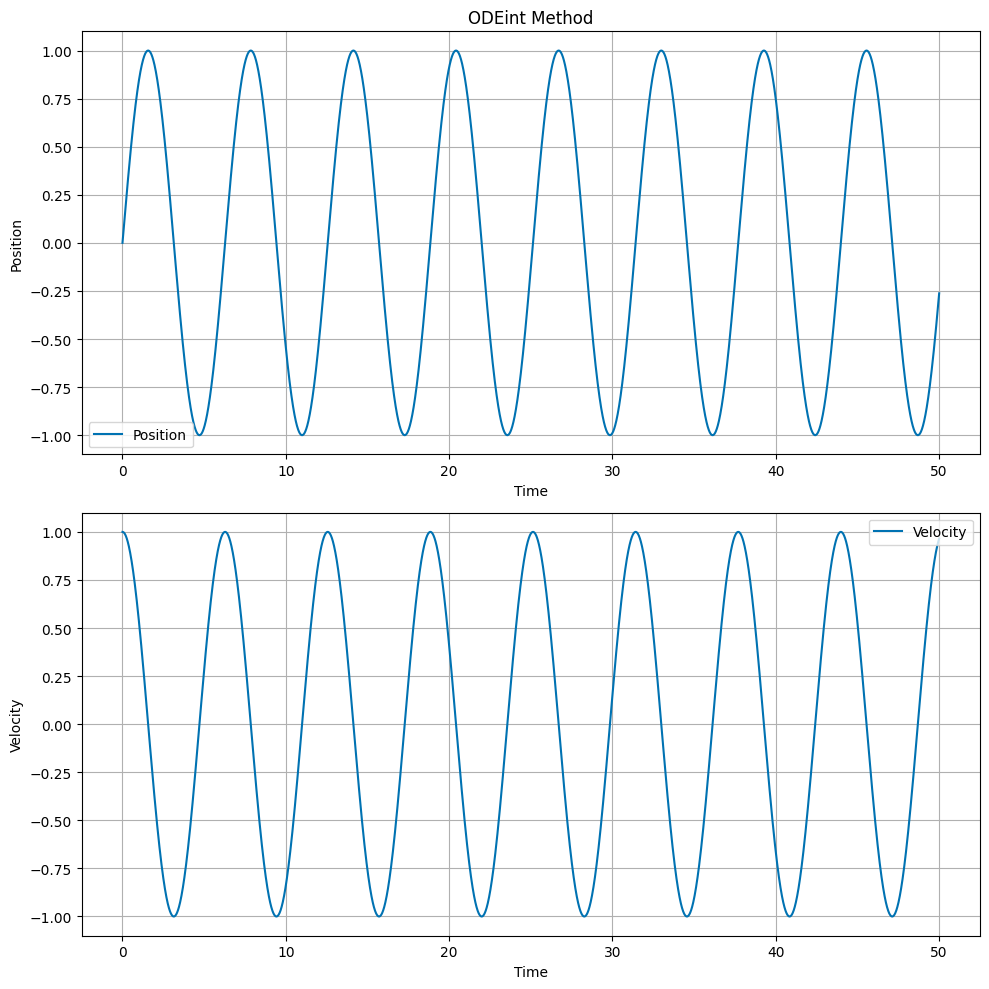

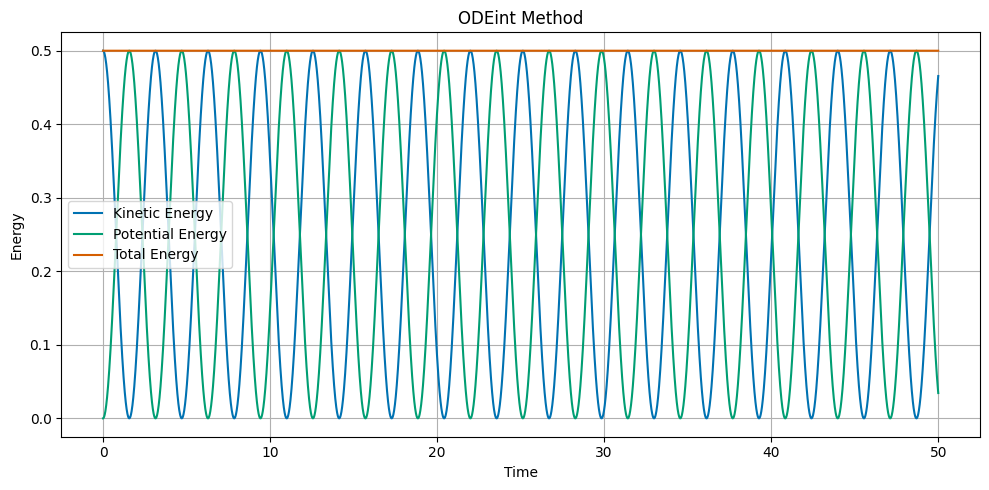

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')

# Define the system of differential equations
def derivs(y, t, omega):
    x, v = y
    dydt = [v, -omega**2 * x]
    return dydt

x0 = 0
v0 = 1
omega = 1

t0 = 0
tf = 50
dt = 0.01

N = int((tf - t0) / dt)

y0 = [x0, v0]
t = np.linspace(t0, tf, N)

# Solve the ODE
sol = odeint(derivs, y0, t, args=(omega,))

# Extract the position and velocity
x = sol[:, 0]
v = sol[:, 1]

# Plot the position and velocity as a function of time
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('ODEint Method')

ax[0].plot(t, x, label='Position')
ax[0].set_ylabel('Position')
ax[0].set_xlabel('Time')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, v, label='Velocity')
ax[1].set_ylabel('Velocity')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Plot the kinetic, potential, and total energy as a function of time
KE = 0.5 * v**2
PE = 0.5 * omega**2 * x**2
ETOT = KE + PE

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('ODEint Method')
ax.plot(t, KE, label='Kinetic Energy')
ax.plot(t, PE, label='Potential Energy')
ax.plot(t, ETOT, label='Total Energy')
ax.set_ylabel('Energy')
ax.set_xlabel('Time')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()